In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib, glob
import cartopy.crs as ccrs
from scipy.signal import savgol_filter
import string
from cartopy.util import add_cyclic_point
from matplotlib import colors

%run ./get_fixed_variables.ipynb # load plotting functions and fixed vars

In [2]:
## load surface temperature [K]
TS_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_strato.npy')
TS_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_nostrato.npy')
TS_8xco2_control = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_spinup.npy')[:-120]
TS_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_strato.npy')
TS_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_nostrato.npy')
TS_1xco2_control = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI.npy')

In [3]:
## compute zonal average for each cloud-locking simulation
TSzonal_8xco2_nostrato = np.nanmean(TS_8xco2_nostrato, axis = -1)
TSzonal_8xco2_strato = np.nanmean(TS_8xco2_strato, axis = -1)
TSzonal_8xco2_control = np.nanmean(TS_8xco2_control, axis = -1)

TSzonal_1xco2_nostrato = np.nanmean(TS_1xco2_nostrato, axis = -1)
TSzonal_1xco2_strato = np.nanmean(TS_1xco2_strato, axis = -1)
TSzonal_1xco2_control = np.nanmean(TS_1xco2_control, axis = -1)

In [4]:
np.nansum(np.nanmean(yearly_avg(TS_1xco2_control,year_to_avg), axis = -1)*gw)/np.nansum(gw)-273.13

NameError: name 'year_to_avg' is not defined

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8), tight_layout=True)

year_to_avg = 10 # years to average 

x8co2_strato_TS_diff = yearly_avg(TSzonal_8xco2_strato,year_to_avg) - yearly_avg(TSzonal_8xco2_control,year_to_avg) # difference between strato and control, 8xco2
x8co2_nostrato_TS_diff = yearly_avg(TSzonal_8xco2_nostrato,year_to_avg) - yearly_avg(TSzonal_8xco2_control,year_to_avg)# difference between nostrato and control, 8xco2
x1co2_strato_TS_diff = yearly_avg(TSzonal_1xco2_strato,year_to_avg) - yearly_avg(TSzonal_1xco2_control,year_to_avg) # difference between strato and control, 1xco2
x1co2_nostrato_TS_diff = yearly_avg(TSzonal_1xco2_nostrato,year_to_avg) - yearly_avg(TSzonal_1xco2_control,year_to_avg) # difference between nostrato and control, 1xco2


ax[0,0].plot(lat, x8co2_nostrato_TS_diff, 'r',linewidth = 4,label = '8xCO$_2$, $\\it{no}$-$\\it{strato} -$ Control')
ax[0,0].plot(lat, x8co2_strato_TS_diff, 'b',linewidth = 4,label = '8xCO$_2$, $\\it{strato} - $ Control')
ax[0,0].legend(fontsize=11, loc = 'upper right')
ax[0,0].grid()
ax[0,0].set_ylabel('$\\Delta T_S$ (K)', fontsize=15)
ax[0,0].set_xlabel('Latitude', fontsize=15)
ax[0,0].set_ylim(-6,6)
ax[0,0].set_xlim(-90,90)
ax[0,0].axhline(y=0, color = 'k', linewidth=2)

mean_diff_8xco2_strato = np.nansum(x8co2_strato_TS_diff*gw)/(np.sum(gw)) # calculate global mean difference
mean_diff_8xco2_nostrato = np.nansum(x8co2_nostrato_TS_diff*gw)/(np.sum(gw))

ax[0,0].text(-75, 4.7, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_8xco2_strato,2)), color = 'b', fontsize = 13)
ax[0,0].text(-75, 3.7, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_8xco2_nostrato,2)), color = 'r', fontsize = 13)

ax[0,0].axvspan(-33,0, alpha = 0.3, color = 'purple')
ax[0,0].axvspan(15,40, alpha = 0.3, color = 'purple')

x8co2_nostrato_TS_diff_land = np.nanmean(yearly_avg(TS_8xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(TS_8xco2_control*LANDMASK,year_to_avg), axis = -1) # difference only over land
x8co2_strato_TS_diff_land = np.nanmean(yearly_avg(TS_8xco2_strato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(TS_8xco2_control*LANDMASK,year_to_avg), axis = -1)

ax[0,1].plot(lat, x8co2_nostrato_TS_diff_land, 'r--',linewidth = 4,label = '8xCO$_2$, $\\it{no}$-$\\it{strato} - $ Control, land')
ax[0,1].plot(lat, x8co2_strato_TS_diff_land, 'b--',linewidth = 4,label = '8xCO$_2$, $\\it{strato} - $ Control, land')
mean_diff_8xco2_nostrato = np.nansum(x8co2_nostrato_TS_diff_land*gw)/(np.sum(gw))
mean_diff_8xco2_strato = np.nansum(x8co2_strato_TS_diff_land*gw)/(np.sum(gw))


ax[0,1].legend(fontsize=11, loc = 'upper right')
ax[0,1].grid()

ax[0,1].set_xlabel('Latitude', fontsize=15)
ax[0,1].set_ylim(-6,6)
ax[0,1].set_xlim(-90,90)

ax[0,1].text(-75, 4.7, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_8xco2_strato,2)), color = 'b', fontsize = 13)
ax[0,1].text(-75, 3.7, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_8xco2_nostrato,2)), color = 'r', fontsize = 13)

ax[0,1].axvspan(-33,0, alpha = 0.3, color = 'purple')
ax[0,1].axvspan(15,40, alpha = 0.3, color = 'purple')

ax[0,0].tick_params(axis='both', which='major', labelsize=15)
ax[0,1].tick_params(axis='both', which='major', labelsize=15)
ax[0,1].tick_params(labelleft=False)


ax[1,0].plot(lat, x1co2_nostrato_TS_diff, 'r',linewidth = 4,label = '1xCO$_2$, $\\it{no}$-$\\it{strato} -$ Control')
ax[1,0].plot(lat, x1co2_strato_TS_diff, 'b',linewidth = 4,label = '1xCO$_2$, $\\it{strato} - $ Control')
ax[1,0].legend(fontsize=11, loc = 'upper right')
ax[1,0].grid()
ax[1,0].set_ylabel('$\\Delta T_S$ (K)', fontsize=15)
ax[1,0].set_xlabel('Latitude', fontsize=15)
ax[1,0].set_ylim(-6,6)
ax[1,0].set_xlim(-90,90)
ax[1,0].axhline(y=0, color = 'k', linewidth=2)

mean_diff_1xco2_strato = np.nansum(x1co2_strato_TS_diff*gw)/(np.sum(gw)) # calculate global mean difference
mean_diff_1xco2_nostrato = np.nansum(x1co2_nostrato_TS_diff*gw)/(np.sum(gw))

ax[1,0].text(-75, 4.7, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_1xco2_strato,2)), color = 'b', fontsize = 13)
ax[1,0].text(-75, 3.7, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_1xco2_nostrato,2)), color = 'r', fontsize = 13)

ax[1,0].axvspan(-33,0, alpha = 0.3, color = 'purple')
ax[1,0].axvspan(15,40, alpha = 0.3, color = 'purple')

x1co2_nostrato_TS_diff_land = np.nanmean(yearly_avg(TS_1xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(TS_1xco2_control*LANDMASK,year_to_avg), axis = -1) # difference only over land
x1co2_strato_TS_diff_land = np.nanmean(yearly_avg(TS_1xco2_strato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(TS_1xco2_control*LANDMASK,year_to_avg), axis = -1)

ax[1,1].plot(lat, x1co2_nostrato_TS_diff_land, 'r--',linewidth = 4,label = '1xCO$_2$, $\\it{no}$-$\\it{strato} - $ Control, land')
ax[1,1].plot(lat, x1co2_strato_TS_diff_land, 'b--',linewidth = 4,label = '1xCO$_2$, $\\it{strato} - $ Control, land')
mean_diff_1xco2_nostrato = np.nansum(x1co2_nostrato_TS_diff_land*gw)/(np.sum(gw))
mean_diff_1xco2_strato = np.nansum(x1co2_strato_TS_diff_land*gw)/(np.sum(gw))


ax[1,1].legend(fontsize=11, loc = 'upper right')
ax[1,1].grid()

ax[1,1].set_xlabel('Latitude', fontsize=15)
ax[1,1].set_ylim(-6,6)
ax[1,1].set_xlim(-90,90)

ax[1,1].text(-75, 4.7, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_1xco2_strato,2)), color = 'b', fontsize = 13)
ax[1,1].text(-75, 3.7, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_1xco2_nostrato,2)), color = 'r', fontsize = 13)

ax[1,1].axvspan(-33,0, alpha = 0.3, color = 'purple')
ax[1,1].axvspan(15,40, alpha = 0.3, color = 'purple')

ax[1,0].tick_params(axis='both', which='major', labelsize=15)
ax[1,1].tick_params(axis='both', which='major', labelsize=15)
ax[1,1].tick_params(labelleft=False)





ax[0,0].annotate("A", xy=(-0.1, 1.1), xycoords="axes fraction",fontsize=15, weight = 'bold')
ax[0,1].annotate("B", xy=(-0.1, 1.1), xycoords="axes fraction",fontsize=15, weight = 'bold')
ax[1,0].annotate("C", xy=(-0.1, 1.1), xycoords="axes fraction",fontsize=15, weight = 'bold')
ax[1,1].annotate("D", xy=(-0.1, 1.1), xycoords="axes fraction",fontsize=15, weight = 'bold')

ax[0,0].set_title('Zonal Mean', fontsize=15)
ax[0,1].set_title('Land-Only Zonal Mean', fontsize=15)


plt.savefig('./Figure_PDFs/Figure_S2.pdf', bbox_inches = 'tight')

In [5]:
conv = 1000*60*60*24
#LANDMASK_nan[yearly_avg(SOILLIQ_8xco2[:,0,:,:], 30) < 1e10] = 1
S1_vars = np.array([[yearly_avg(TS_8xco2_nostrato,30)-yearly_avg(TS_8xco2_control,30),yearly_avg(TS_8xco2_strato,30)-yearly_avg(TS_8xco2_control,30)],
                    [yearly_avg(TS_1xco2_nostrato,30)-yearly_avg(TS_1xco2_control,30),yearly_avg(TS_1xco2_strato,30)-yearly_avg(TS_1xco2_control,30)]])
levels_list = [[np.linspace(-5,5,33),np.linspace(-5,5,33)],
               [np.linspace(-5,5,33),np.linspace(-5,5,33)]]
cmap_list = np.array([['RdBu_r','RdBu_r'],
                      ['RdBu_r','RdBu_r'],
                      ['RdBu_r','RdBu_r'],
                      ['RdBu_r','RdBu_r'],
                     ['RdBu_r','RdBu_r']])
title_list = np.array([['$\\Delta T_s$ (K) \n in 8xCO$_2$-locked $\\it{no}$-$\\it{strato} -$ Control', '$\\Delta T_s$ (K) \n in 8xCO$_2$-locked $\\it{strato} -$ Control'],
                       ['$\\Delta T_s$ (K) \n in 1xCO$_2$-locked $\\it{no}$-$\\it{strato} -$ Control', '$\\Delta T_s$ (K) \n in 1xCO$_2$-locked $\\it{strato} -$ Control']])


text_list = np.array([['A','B'],['C','D'],['E','F'],['G','H'],['I','J']])


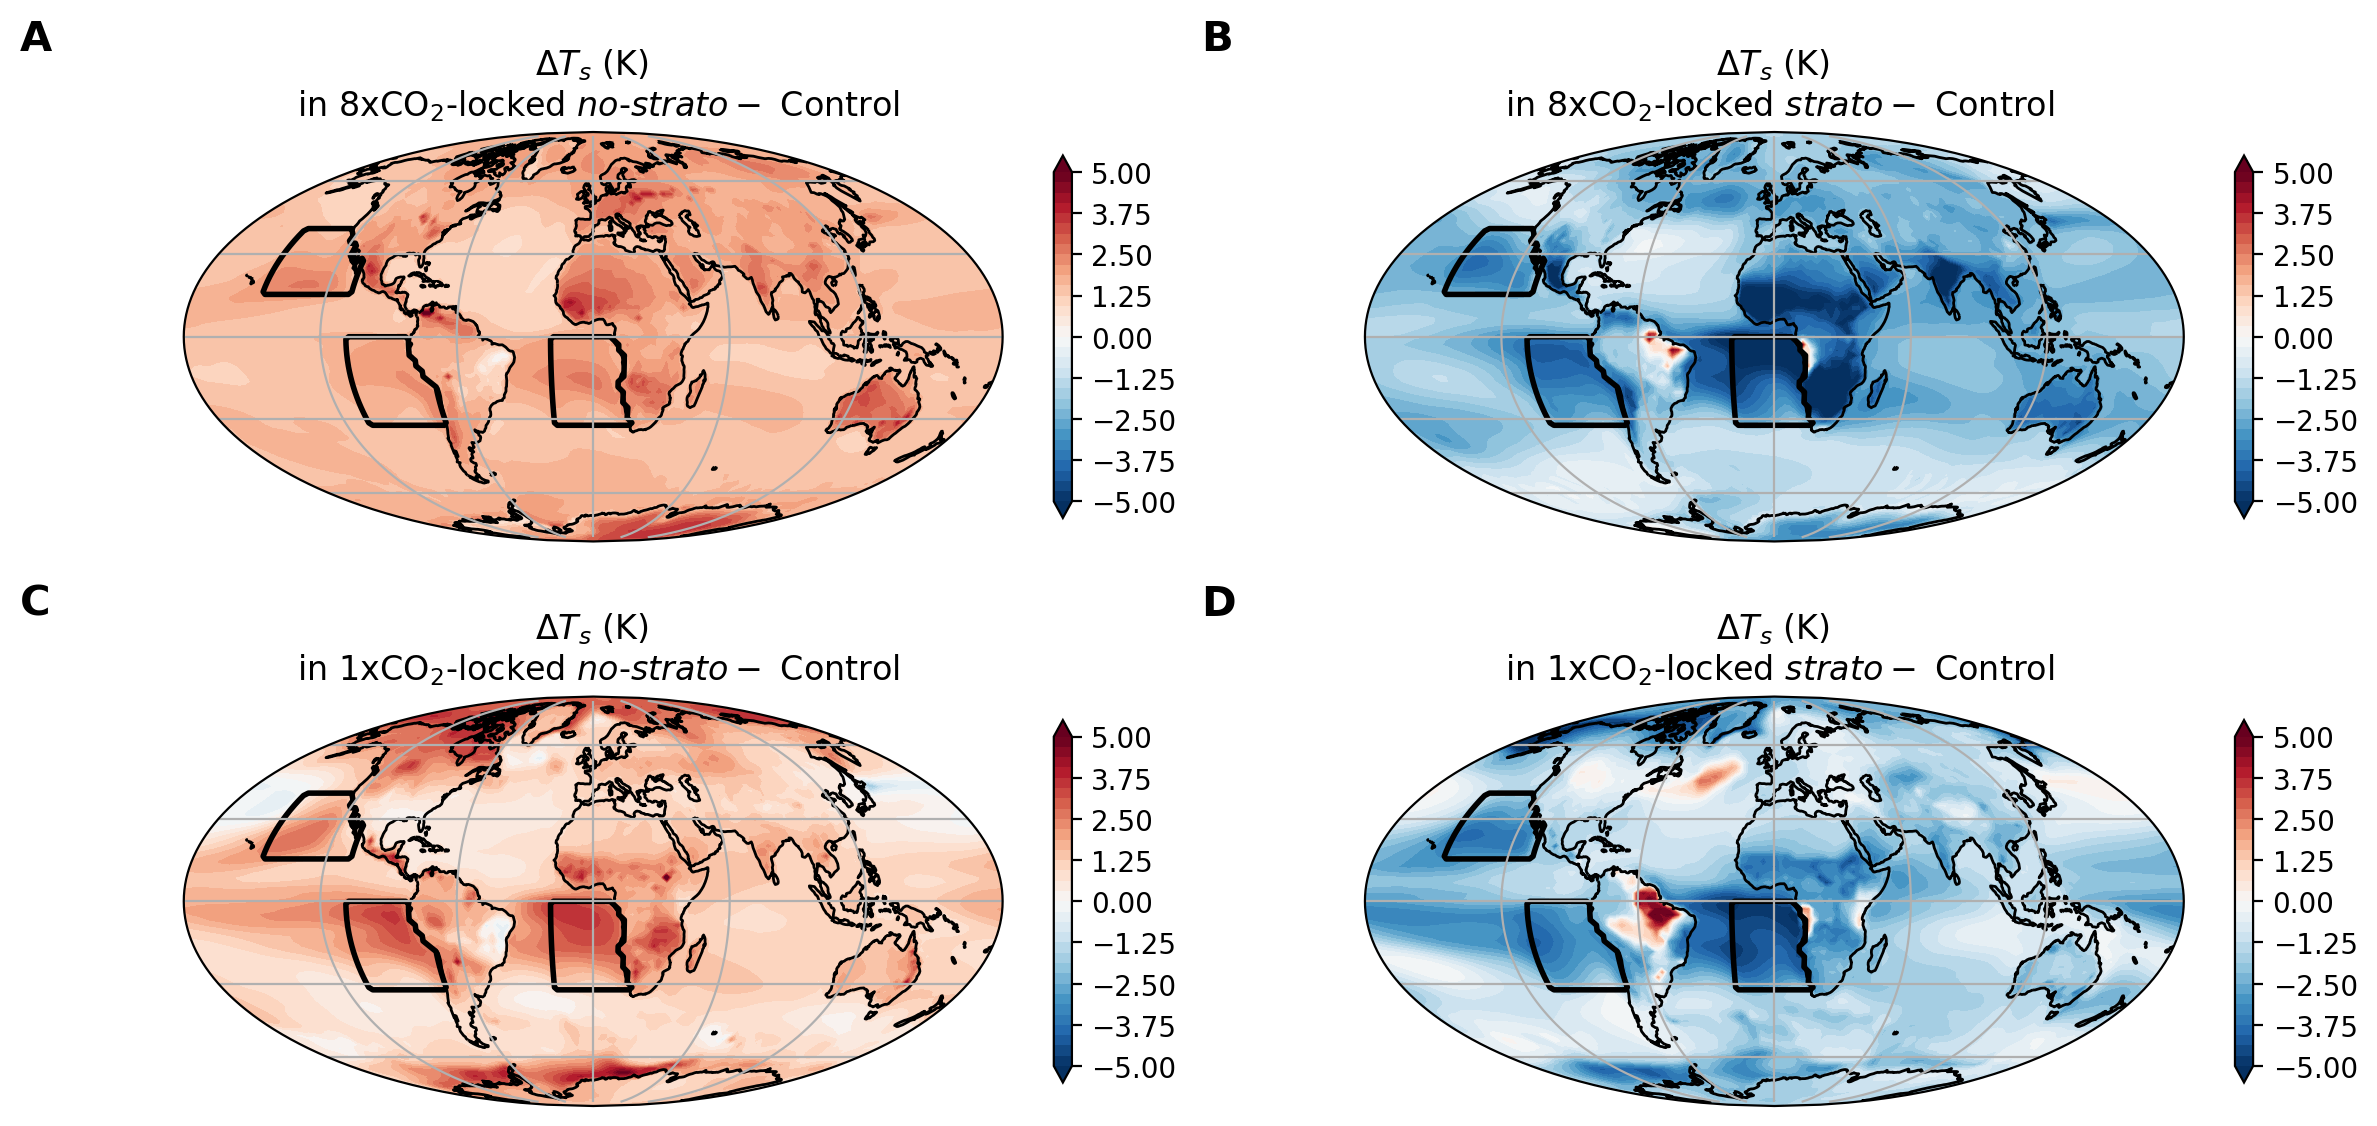

In [6]:
extend = 'both'
shrink = 0.7
make_subplots(S1_vars, levels_list,cmap_list, title_list, 0, text_list, (12,6))